In [106]:
import math
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

%matplotlib inline

In [165]:
air = pd.read_csv("modified/air_reserve.csv", index_col=0)
hpg = pd.read_csv("modified/hpg_reserve.csv", index_col=0)

visit = pd.read_csv("modified/visit.csv", index_col=0)

date = pd.read_csv("modified/date.csv", index_col=0)

store_full = pd.read_csv("modified/store_full.csv", index_col=0, encoding="utf_16")

In [174]:
air["reserve_datetime"] = pd.to_datetime(air['reserve_datetime'])
air["visit_datetime"] = pd.to_datetime(air['visit_datetime'])

hpg["reserve_datetime"] = pd.to_datetime(hpg['reserve_datetime'])
hpg["visit_datetime"] = pd.to_datetime(hpg['visit_datetime'])

visit["visit_date"] = pd.to_datetime(visit['visit_date'])

date["calendar_date"] = pd.to_datetime(date['calendar_date'])

## Geography of restaurants

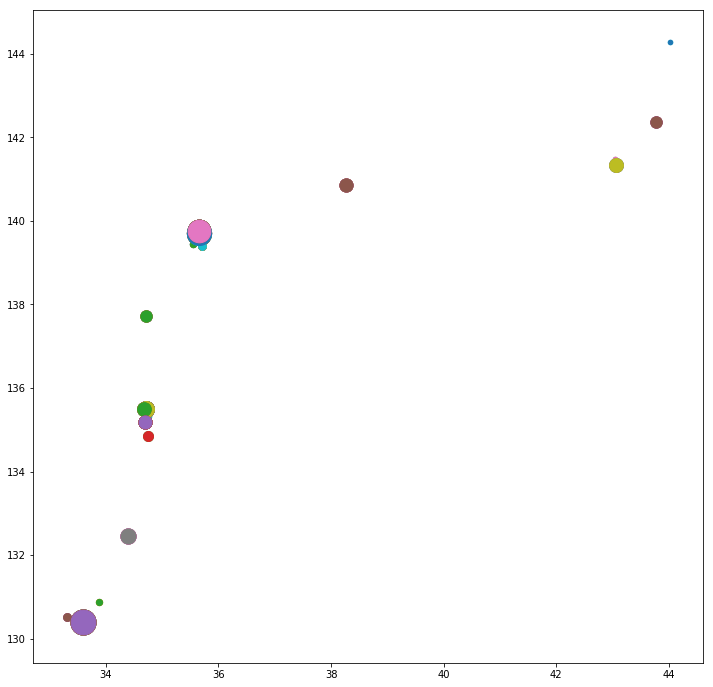

In [133]:
coord_freq = Counter()
coords = store_full[["latitude", "longitude"]].values.tolist()
size = len(coords)

plt.figure(figsize=(12,12))
for i in range(size):
    coord_freq[str(coords[i])] += 1 

list_pos = store_full[["latitude", "longitude"]].drop_duplicates().values.tolist()
for i in range(len(list_pos)):
    f = coord_freq[str(coords[i])]
    plt.scatter(coords[i][0], coords[i][1], s=f*10)
plt.show()

## Repartition temps reservation

In [152]:
air["delta"] = air["visit_datetime"] - air["reserve_datetime"]
hpg["delta"] = hpg["visit_datetime"] - hpg["reserve_datetime"]

In [159]:
air["delta"] = air["delta"].astype('timedelta64[h]')
hpg["delta"] = hpg["delta"].astype('timedelta64[h]')

In [191]:
air["visit_datetime2"] = air["visit_datetime"].dt.strftime('%Y-%m-%d')
hpg["visit_datetime2"] = hpg["visit_datetime"].dt.strftime('%Y-%m-%d')

In [192]:
air.set_index('visit_datetime2').join(date.set_index('calendar_date')).reset_index()
hpg.set_index('visit_datetime2').join(date.set_index('calendar_date')).reset_index()

,index,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,day_of_week,holiday_flg,evening_holiday
0,2016-01-01,air_37189c92b6c761ec,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Friday,1,1
1,2016-01-01,air_37189c92b6c761ec,2016-01-01 20:00:00,2016-01-01 01:00:00,2,Friday,1,1
2,2016-01-01,air_db80363d35f10926,2016-01-01 19:00:00,2016-01-01 16:00:00,4,Friday,1,1
3,2016-01-01,air_6b15edd1b4fbb96a,2016-01-01 19:00:00,2016-01-01 19:00:00,3,Friday,1,1
4,2016-01-01,air_08cb3c4ee6cd6a22,2016-01-01 19:00:00,2016-01-01 19:00:00,2,Friday,1,1
5,2016-01-02,air_5d7c744c3a2ef624,2016-01-02 18:00:00,2016-01-02 17:00:00,2,Saturday,1,1
6,2016-01-02,air_37189c92b6c761ec,2016-01-02 01:00:00,2016-01-01 16:00:00,3,Saturday,1,1
7,2016-01-02,air_37189c92b6c761ec,2016-01-02 17:00:00,2016-01-02 16:00:00,6,Saturday,1,1
8,2016-01-02,air_37189c92b6c761ec,2016-01-02 18:00:00,2016-01-02 17:00:00,7,Saturday,1,1
9,2016-01-02,air_3c938075889fc059,2016-01-02 19:00:00,2016-01-02 19:00:00,4,Saturday,1,1


In [194]:
a = air.groupby(["air_store_id", "visit_datetime2"]).agg({
    "reserve_visitors" : "sum"
})

b = visit.groupby(["air_store_id", "visit_date"]).agg({
    "visitors" : "sum"
})

reserve_visitors
air_store_id         visit_datetime2                  
air_00a91d42b08b08d9 2016-10-31                      2
                     2016-12-05                      9
                     2016-12-14                     18
                     2016-12-17                      2
                     2016-12-20                      4
                     2017-02-18                      9
                     2017-02-23                     12
                     2017-03-01                      3
                     2017-03-14                      4
                     2017-03-21                      3
                     2017-03-24                      2
                     2017-04-04                      2
air_0164b9927d20bcc3 2016-10-28                     12
                     2016-11-01                     10
                     2016-11-02                      3
                     2016-11-08                      9
                     2016-11-10                      6
                     2016-11-11                      4
                     2016-11-14                     17
                     2016-11-15                      3
                     2016-11-16                      2
                     2016-11-18                     13
                     2016-11-21                      3
                     2016-11-22                      9
                     2016-11-24                      2
                     2016-11-26                     10
                     2016-11-28                      2
                     2016-12-02                      3
                     2016-12-05                      4
                     2016-12-06                      2
...                                                ...
air_fea5dc9594450608 2017-03-08                      2
                     2017-03-10                      3
                     2017-03-11                      7
                     2017-03-16                      3
                     2017-03-17                     11
                     2017-03-18                     10
                     2017-03-21                      5
                     2017-03-22                      2
                     2017-03-23                      8
                     2017-03-24                      2
                     2017-03-25                      6
                     2017-03-29                      2
                     2017-03-30                      5
                     2017-04-01                      2
                     2017-04-05                      4
                     2017-04-07                      2
                     2017-04-08                      5
                     2017-04-11                      4
                     2017-04-12                      2
                     2017-04-14                      2
                     2017-04-15                      4
                     2017-04-18                      2
                     2017-04-19                      2
                     2017-04-20                      6
                     2017-04-21                     10
                     2017-04-22                      2
                     2017-04-25                      2
                     2017-04-28                      3
                     2017-05-20                      6
air_fee8dcf4d619598e 2017-01-09                      5

[29830 rows x 1 columns]

In [198]:
visit.groupby(["air_store_id", "visit_date"]).agg({
    "visitors" : "sum"
})

visitors
air_store_id         visit_date          
air_00a91d42b08b08d9 2016-07-01        35
                     2016-07-02         9
                     2016-07-04        20
                     2016-07-05        25
                     2016-07-06        29
                     2016-07-07        34
                     2016-07-08        42
                     2016-07-09        11
                     2016-07-11        25
                     2016-07-12        24
                     2016-07-13        36
                     2016-07-14        28
                     2016-07-15        28
                     2016-07-16         5
                     2016-07-19        25
                     2016-07-20        19
                     2016-07-21        47
                     2016-07-22        53
                     2016-07-23        16
                     2016-07-25        16
                     2016-07-26        16
                     2016-07-27        24
                     2016-07-28        34
                     2016-07-29        31
                     2016-07-30        20
                     2016-08-01        16
                     2016-08-02        24
                     2016-08-03        30
                     2016-08-04        30
                     2016-08-05        42
...                                   ...
air_fff68b929994bfbd 2017-03-24         8
                     2017-03-25         7
                     2017-03-26         3
                     2017-03-27         4
                     2017-03-28         9
                     2017-03-29         2
                     2017-03-30         5
                     2017-03-31         5
                     2017-04-01         9
                     2017-04-02         2
                     2017-04-03         2
                     2017-04-04         4
                     2017-04-05         6
                     2017-04-06         6
                     2017-04-07         9
                     2017-04-08         4
                     2017-04-09         5
                     2017-04-10         6
                     2017-04-11         1
                     2017-04-12         6
                     2017-04-13         1
                     2017-04-14         5
                     2017-04-15         7
                     2017-04-16         7
                     2017-04-17         3
                     2017-04-18         6
                     2017-04-19         2
                     2017-04-20         2
                     2017-04-21         4
                     2017-04-22         5

[252108 rows x 1 columns]

In [ ]:
a = air.groupby(["air_store_id", "visit_datetime2"]).agg({
    "reserve_visitors" : "sum"
}).reset_index()

b = visit.groupby(["air_store_id", "visit_date"]).agg({
    "visitors" : "sum"
}).reset_index()

b.set_index('visit_datetime2').join(date.set_index('calendar_date')).reset_index()

In [199]:
visit["air_store_id"].value_counts()

air_5c817ef28f236bdf    477
air_a083834e7ffe187e    476
air_d97dabf7aae60da5    476
air_36bcf77d3382d36e    476
air_60a7057184ec7ec7    475
air_71903025d39a4571    475
air_232dcee6f7c51d37    475
air_883ca28ef0ed3d55    474
air_7a946aada80376a4    474
air_cb7467aed805e7fe    473
air_d0e8a085d8dc83aa    473
air_4cca5666eaf5c709    473
air_6b15edd1b4fbb96a    472
air_dea0655f96947922    472
air_fe22ef5a9cbef123    472
air_3c05c8f26c611eb9    472
air_04341b588bde96cd    472
air_39dccf7df20b1c6a    471
air_ba495cccc8f0f237    471
air_7cf5a02c0e01b647    471
air_f6b2489ccf873c3b    470
air_2b8b29ddfd35018e    470
air_287d2de7d3c93406    470
air_e270aff84ac7e4c8    470
air_536043fcf1a4f8a4    470
air_638c35eb25e53eea    470
air_640cf4835f0d9ba3    470
air_8c119d1f16049f20    470
air_93ebe490d4abb8e9    469
air_4d71826793c09b22    469
                       ... 
air_0164b9927d20bcc3    149
air_1f34e9beded2231a    148
air_0ead98dd07e7a82a    138
air_fb44f566d4f64a4e    134
air_ef47430bcd6f6a89